Question 01: (a) Download the data and pre-process in any way necessary. How many data items and features does it have? What are their types?

In [1]:
import pandas as pd #loading the dataset into pandas data frame
df = pd.read_csv("dataset_31_credit-g.csv")

In [2]:
#list of all the columns in the dataframe
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [3]:
#priting top 5 rows of the dataframe
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [8]:
#checking the presence of missing or null values (count)
df.isna().sum() #missing or null values

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [9]:
#checking the presence of missing or null values (boolean)
df.isna().any() #boolean values for any missing or null value (True) or not (False)

checking_status           False
duration                  False
credit_history            False
purpose                   False
credit_amount             False
savings_status            False
employment                False
installment_commitment    False
personal_status           False
other_parties             False
residence_since           False
property_magnitude        False
age                       False
other_payment_plans       False
housing                   False
existing_credits          False
job                       False
num_dependents            False
own_telephone             False
foreign_worker            False
class                     False
dtype: bool

In [11]:
#prints all the columns with category type data
df.select_dtypes(include=['category', object]).columns

Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [7]:
#Descriptive statistics include those that summarize the central tendency, 
#dispersion and shape of a dataset’s distribution, excluding NaN values.
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [28]:
#printing total number of unique values. For columns installment_commitment, residence_since, existing_credits and 
#num_dependencies, as the number of unique value is just 4 or less than 4. These columns will also be considered as columns
#with categorical data type. 
print("Total number of unique values in each of the columns other than categorical data columns obtained aboveare: \n duration ", len(df.duration.value_counts()))
print("\n credit_amount ", len(df.credit_amount.value_counts()))
print("\n installment_commitment ", len(df.installment_commitment.value_counts()))
print("\n residence_since ", len(df.residence_since.value_counts()))
print("\n age ", len(df.age.value_counts()))
print("\n existing_credits ", len(df.existing_credits.value_counts()))
print("\n num_dependents " ,len(df.num_dependents.value_counts()))

Total number of unique values in each of the columns other than categorical data columns obtained aboveare: 
 duration  33

 credit_amount  921

 installment_commitment  4

 residence_since  4

 age  53

 existing_credits  4

 num_dependents  2


Based on the above three cells, we can obtain that the columns with categorical columns are:
checking_status, credit_history, purpose, saving_status, employment, personal_status, other_parties, property_magnitude, other_payment_plans, housing, job, own_telephone, foreign_worker, class

Along with the above data, based on the distribution of data under the rest of the columns, some more categorical columns are identified,
installment_commitment, residence_since, existing_credits, num_dependents.

The conitnuous columns are:
duration,
credit_amount ,
age


In [33]:
#data types of each column
df.dtypes

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object

In [35]:
#number of rows and number of columns present in the dataframe
print("Number of rows: ", len(df.axes[0]))
print("Number of columns: ", len(df.axes[1]))

Number of rows:  1000
Number of columns:  21


In [36]:
#number of data items and number of features to predict the columns class, present in the data frame. 
print("Number of data items: ", len(df.axes[0]))
print("Number of features: ", len(df.axes[1])-1)

Number of data items:  1000
Number of features:  20


1(b) Perform classification on the class label with at least two methods.
Present model accuracy, recall and F1 statistics. If possible, print model structure.

In [43]:
#One hot Encoding the categorical data columns and storing it into new_df (different dataframe variable)
new_df = pd.get_dummies(df, columns=['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker'], prefix=['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker'])

In [44]:
new_df.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class,checking_status_'0<=X<200',checking_status_'<0',checking_status_'>=200',checking_status_'no checking',credit_history_'all paid',credit_history_'critical/other existing credit',credit_history_'delayed previously',credit_history_'existing paid',credit_history_'no credits/all paid',purpose_'domestic appliance',purpose_'new car',purpose_'used car',purpose_business,purpose_education,purpose_furniture/equipment,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,savings_status_'100<=X<500',savings_status_'500<=X<1000',savings_status_'<100',savings_status_'>=1000',savings_status_'no known savings',employment_'1<=X<4',employment_'4<=X<7',employment_'<1',employment_'>=7',employment_unemployed,personal_status_'female div/dep/mar',personal_status_'male div/sep',personal_status_'male mar/wid',personal_status_'male single',other_parties_'co applicant',other_parties_guarantor,other_parties_none,property_magnitude_'life insurance',property_magnitude_'no known property',property_magnitude_'real estate',property_magnitude_car,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_'for free',housing_own,housing_rent,job_'high qualif/self emp/mgmt',job_'unemp/unskilled non res',job_'unskilled resident',job_skilled,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,6,1169,4,4,67,2,1,good,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1
1,48,5951,2,2,22,1,1,bad,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1
2,12,2096,2,3,49,1,2,good,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1
3,42,7882,2,4,45,1,2,good,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1
4,24,4870,3,4,53,2,2,bad,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1


In [45]:
#number of rows and columns present in the new data frame (after one hot encoding)
print("Number of rows: ", len(new_df.axes[0]))
print("Number of columns: ", len(new_df.axes[1]))

Number of rows:  1000
Number of columns:  62


In [46]:
#number of data items and features present in the new data frame
#number of data items remains same 
#number of features chanegs from 20 --> 61 (because of one hot encoding the categorical features)
print("Number of data items: ", len(new_df.axes[0]))
print("Number of features: ", len(new_df.axes[1])-1)

Number of data items:  1000
Number of features:  61


In [49]:
#Converting the class - categorical data column and encoding it with numerical codes
new_df['class'] = new_df['class'].astype('category')
new_df['class'] = new_df['class'].cat.codes

In [50]:
#printing top five rows from the new data frame
new_df.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class,checking_status_'0<=X<200',checking_status_'<0',checking_status_'>=200',checking_status_'no checking',credit_history_'all paid',credit_history_'critical/other existing credit',credit_history_'delayed previously',credit_history_'existing paid',credit_history_'no credits/all paid',purpose_'domestic appliance',purpose_'new car',purpose_'used car',purpose_business,purpose_education,purpose_furniture/equipment,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,savings_status_'100<=X<500',savings_status_'500<=X<1000',savings_status_'<100',savings_status_'>=1000',savings_status_'no known savings',employment_'1<=X<4',employment_'4<=X<7',employment_'<1',employment_'>=7',employment_unemployed,personal_status_'female div/dep/mar',personal_status_'male div/sep',personal_status_'male mar/wid',personal_status_'male single',other_parties_'co applicant',other_parties_guarantor,other_parties_none,property_magnitude_'life insurance',property_magnitude_'no known property',property_magnitude_'real estate',property_magnitude_car,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_'for free',housing_own,housing_rent,job_'high qualif/self emp/mgmt',job_'unemp/unskilled non res',job_'unskilled resident',job_skilled,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,6,1169,4,4,67,2,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1
1,48,5951,2,2,22,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1
2,12,2096,2,3,49,1,2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1
3,42,7882,2,4,45,1,2,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1
4,24,4870,3,4,53,2,2,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1


In [108]:
#loading all the required libraries for model, and metric score calculations
#The experiment is done over four different models, 
#1. Support Vector Classifier
#2. Random Forest Classifier
#3. Logistic Regression
#4. Naive Bayes
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import numpy as np

In [101]:
#defined a function to calculate accuracy, precision, recall and f1-score
#of trained models over test dataset.
def model_metrics(predictions, test_label):
  predictions = np.array([i+1 for i in predictions])
  test_label = np.array([i+1 for i in test_label])
  errors = abs(predictions - test_label)
  mape = 100 * (errors / test_label)
  accur = 100 - np.mean(mape)
  predictions = [round(i,0) for i in predictions]
  prf = precision_recall_fscore_support(test_label, predictions, labels = [1,2], average='weighted')

  return round(accur,2), prf[0], prf[1], prf[2]

In [106]:
#defined functions for each model, which trains the model, calculates the AUC and
#also references to model_metrics function which returns accuracy, precision, recall
#and F1-Score
def model_RF(train, train_label, test, test_label):
  rf = RandomForestClassifier(max_depth=2, random_state = 43332)
  rf.fit(train, train_label)
  predictions = rf.predict(test)
  accuracy, precision, recall, fscore = model_metrics(predictions, test_label)
  #print(roc_auc_score(test_label, predictions))
  #raise KeyboardInterrupt
  print(rf)

  return accuracy, precision, recall, fscore, roc_auc_score(test_label, predictions)

def model_NB(train, train_label, test, test_label):
  gnb = GaussianNB()
  predictions = gnb.fit(train, train_label).predict(test)
  accuracy, precision, recall, fscore = model_metrics(predictions, test_label)
  proba = gnb.predict_proba(test)
  #print(roc_auc_score(test_label, proba[:,1]))
  #raise KeyboardInterrupt
  print(gnb)

  return accuracy, precision, recall, fscore, roc_auc_score(test_label, proba[:,1])

def model_LR(train, train_label, test, test_label):
  logreg = LogisticRegression()
  logreg.fit(train, train_label)
  predictions = logreg.predict(test)
  accuracy, precision, recall, fscore = model_metrics(predictions, test_label)
  proba = logreg.predict_proba(test)
  #print(roc_auc_score(test_label, proba[:,1]))
  #raise KeyboardInterrupt
  print(logreg)

  return accuracy, precision, recall, fscore, roc_auc_score(test_label, proba[:,1])

def model_SVM(train, train_label, test, test_label):
  clf = svm.SVC()
  clf.fit(train, train_label)
  predictions = clf.predict(test)
  accuracy, precision, recall, fscore = model_metrics(predictions, test_label)
  #print(roc_auc_score(test_label, predictions))
  #raise KeyboardInterrupt
  print(clf)

  return accuracy, precision, recall, fscore, roc_auc_score(test_label, predictions)

In [77]:
#X- Al the Feature Set
#Y- Label Set
Y = new_df['class'].values
X = new_df.drop(['class'], axis = 1).values

In [78]:
#Scaling the values before giving it input to the model
predscaler = MinMaxScaler()
predscalerfit = predscaler.fit(X)
X = predscalerfit.transform(X)

In [79]:
#Splitting the data set into train and test dataset with a ration of 70% train and 30% test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3, random_state = 4567898)

In [80]:
#printing the shape of my train, test feature set and label set
print(X_Train.shape)
print(Y_Train.shape)
print(X_Test.shape)
print(Y_Test.shape)

(700, 61)
(700,)
(300, 61)
(300,)


In [103]:
#initializing four lists, to store the trained model metric
models_acc = list()
models_pre = list()
models_rec = list()
models_fscore = list()
models_auc = list()

In [104]:
#training SVC Model and storing the metric in their respective lists
accuracy, precision, recall, fscore, auc = model_SVM(X_Train, Y_Train, X_Test, Y_Test)
models_acc.append(accuracy)
models_pre.append(precision)
models_rec.append(recall)
models_fscore.append(fscore)
models_auc.append(auc)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [109]:
#training SVC Model and storing the metric in their respective lists
accuracy, precision, recall, fscore, auc = model_RF(X_Train, Y_Train, X_Test, Y_Test)
models_acc.append(accuracy)
models_pre.append(precision)
models_rec.append(recall)
models_fscore.append(fscore)
models_auc.append(auc)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=43332,
                       verbose=0, warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
#training SVC Model and storing the metric in their respective lists
accuracy, precision, recall, fscore, auc = model_NB(X_Train, Y_Train, X_Test, Y_Test)
models_acc.append(accuracy)
models_pre.append(precision)
models_rec.append(recall)
models_fscore.append(fscore)
models_auc.append(auc)

GaussianNB(priors=None, var_smoothing=1e-09)


In [112]:
#training SVC Model and storing the metric in their respective lists
accuracy, precision, recall, fscore, auc = model_LR(X_Train, Y_Train, X_Test, Y_Test)
models_acc.append(accuracy)
models_pre.append(precision)
models_rec.append(recall)
models_fscore.append(fscore)
models_auc.append(auc)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [114]:
#saving the results for all the four models in a data frame and further into a csv file
results  = pd.DataFrame(data = None, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'])
results['Model'] = ['SupportVectorClassifier', "RandomForestClassifier", "NaiveBayes", "LogisticRegression"]
results['Accuracy'] = models_acc
results['Precision'] = models_pre
results['Recall'] = models_rec
results['F1-Score'] = models_fscore
results['AUC'] = models_auc
results.to_csv("ModelResults_Classification.csv")
results.head()

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,SupportVectorClassifier,81.00,0.759333,0.773333,0.760409,0.675265
1,RandomForestClassifier,72.00,0.518400,0.720000,0.602791,0.500000
2,NaiveBayes,70.00,0.693702,0.436667,0.422830,0.697696
3,LogisticRegression,81.67,0.759053,0.766667,0.761922,0.772707


Question 02: Clustering

Cluster the data with any method without giving the number of classes. Now compare the clusters with the classes. Find the homogeneity, completeness and v-score metrics.

In [124]:
#loading all the necessary python library
import matplotlib.pyplot as plt
import numpy
import sklearn.cluster
from matplotlib import pyplot
from numpy import where, unique
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [167]:
#This code snippet has been taken from the course's github repository. [1]
#This function is to predict the clusters, visualize the clusters and 
#obtain silhouette_score for the cluster.
#The higher the silhouette score, the better the cluster
def cluster_predict_show(model, X, y):
    
    # Fit the model
    m = model.fit(X)
    
    # assign a cluster to each example
    try:
      yhat = model.predict(X)
    except AttributeError:
      yhat = model.fit(X).labels_
    # Silhoutte score - higher is a better cluster
    print ("Cluster score = ", metrics.silhouette_score(X, m.labels_, metric='euclidean'))

    # retrieve unique clusters
    clusters = unique(yhat)

    # create scatter plot for samples from each cluster
    for cluster in clusters:

        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)

        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# show the plot
pyplot.show()

In [175]:
#initializing lists to save the cluster metrics
cluster_homoge = list()
cluster_complete = list()
cluster_vm = list()

Cluster score =  0.11999738365741017


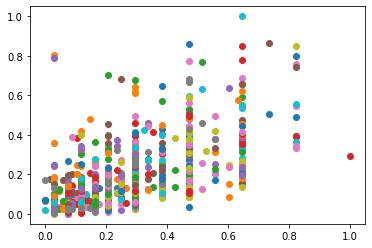

In [176]:
#clustering using agglomerative clustering method without giving the number of clusters
#visualizing the clusters
#printing the silhouette score of the cluster
#storing cluster metric into their respective lists
model = AgglomerativeClustering(n_clusters=None, distance_threshold=3.0)
agg_clustering = model.fit(X,Y)
Y_Pred = agg_clustering.labels_
cluster_fitpredict_show(model, X, Y)
cluster_homoge.append(metrics.homogeneity_completeness_v_measure(Y, Y_Pred)[0])
cluster_complete.append(metrics.homogeneity_completeness_v_measure(Y, Y_Pred)[1])
cluster_vm.append(metrics.homogeneity_completeness_v_measure(Y, Y_Pred)[2])

Cluster score =  0.020790654598064767
Cluster score =  0.020790654598064767


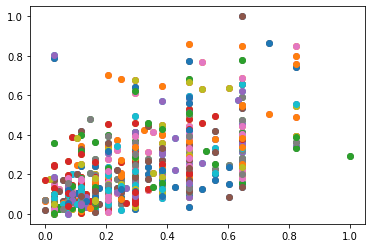

In [177]:
#clustering using Birch method without giving the number of clusters
#visualizing the clusters
#printing the silhouette score of the cluster
#storing cluster metric into their respective lists
model = Birch(n_clusters=None)
cluster_predict_show(model, X, Y)
birch = model.fit(X,Y)
Y_Pred = birch.labels_
cluster_fitpredict_show(model, X, Y)
cluster_homoge.append(metrics.homogeneity_completeness_v_measure(Y, Y_Pred)[0])
cluster_complete.append(metrics.homogeneity_completeness_v_measure(Y, Y_Pred)[1])
cluster_vm.append(metrics.homogeneity_completeness_v_measure(Y, Y_Pred)[2])

Cluster score =  0.11339901082083378
Cluster score =  0.11339901082083378


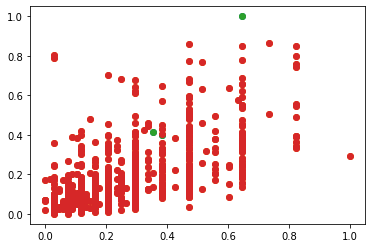

In [178]:
#clustering using DBSCAN method without giving the number of clusters
#visualizing the clusters
#printing the silhouette score of the cluster
#storing cluster metric into their respective lists
model = DBSCAN(eps=3, min_samples=4)
cluster_predict_show(model, X, Y)
dbscan  = model.fit(X,Y)
Y_Pred = dbscan.labels_
cluster_fitpredict_show(model, X, Y)
cluster_homoge.append(metrics.homogeneity_completeness_v_measure(Y, Y_Pred)[0])
cluster_complete.append(metrics.homogeneity_completeness_v_measure(Y, Y_Pred)[1])
cluster_vm.append(metrics.homogeneity_completeness_v_measure(Y, Y_Pred)[2])

Cluster score =  0.05282911444596904


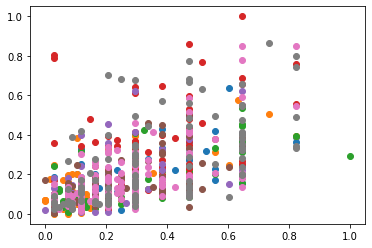

In [179]:
#clustering using KMeans method without giving the number of clusters
#visualizing the clusters
#printing the silhouette score of the cluster
#storing cluster metric into their respective lists
model = KMeans()
cluster_predict_show(model, X, Y)
kmeans = model.fit(X,Y)
Y_Pred = kmeans.labels_
cluster_homoge.append(metrics.homogeneity_completeness_v_measure(Y, Y_Pred)[0])
cluster_complete.append(metrics.homogeneity_completeness_v_measure(Y, Y_Pred)[1])
cluster_vm.append(metrics.homogeneity_completeness_v_measure(Y, Y_Pred)[2])

In [180]:
#saving the results for all the four clustering algorithms in a data frame 
#and further into a csv file
results  = pd.DataFrame(data = None, columns=['Model', 'Homogeneity', 'Completeness', 'V_Measure'])
results['Model'] = ['AgglomerativeClustering',  'Birch', 'DBSCAN', 'KMeans']
results['Homogeneity'] = cluster_homoge
results['Completeness'] = cluster_complete
results['V_Measure'] = cluster_vm
results.to_csv("ModelResults_Clustering.csv")
results.head()

,Model,Homogeneity,Completeness,V_Measure
0,AgglomerativeClustering,0.549944,0.057128,0.103504
1,Birch,0.995461,0.088303,0.162216
2,DBSCAN,0.002819,0.046943,0.005318
3,KMeans,0.026109,0.007742,0.011942


Question: 03 Bonus

The dataset has attributes for age and personal_status. What is the distribution of class with respect to these attributes? Is there a age or personal_status group that can perceive bias? Feel free to pre-process data to gain insights – e.g., binning for age.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f094847f0>,
      dtype=object)

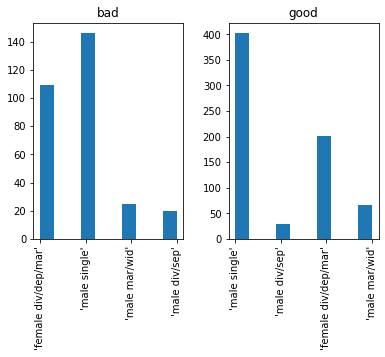

In [182]:
#from the give distribution of personal_status category for good and bad credit classes
#we can see that for the good credit class, there is a bias for "male single" category
#hence the "male single" group of personal_status perceive bias
df['personal_status'].hist(by =df['class'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f07233400>,
      dtype=object)

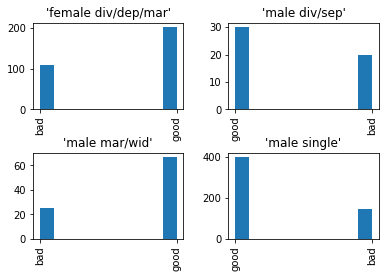

In [193]:
#similar takeaway can be obtained from the histograms obtained below
df['class'].hist(by =df['personal_status'])

In [189]:
#binning the continuous age data into four bins
df['quartiles_age'] = pd.qcut(df['age'], q=4)

In [190]:
#obtaining the list of unique bins
#bins are:
#(18.99, 27.0]
#(27.0, 33.0]
#(33.0, 42.0]
#(42.0, 75.0]
df.quartiles_age.unique

<bound method Series.unique of 0        (42.0, 75.0]
1      (18.999, 27.0]
2        (42.0, 75.0]
3        (42.0, 75.0]
4        (42.0, 75.0]
            ...      
995      (27.0, 33.0]
996      (33.0, 42.0]
997      (33.0, 42.0]
998    (18.999, 27.0]
999    (18.999, 27.0]
Name: quartiles_age, Length: 1000, dtype: category
Categories (4, interval[float64]): [(18.999, 27.0] < (27.0, 33.0] < (33.0, 42.0] < (42.0, 75.0]]>

In [191]:
#encoding the age bins category data column using numerical codes
df['quartiles_age'] =df['quartiles_age'].astype('category')
df['quartiles_age'] = df['quartiles_age'].cat.codes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f0722af28>,
      dtype=object)

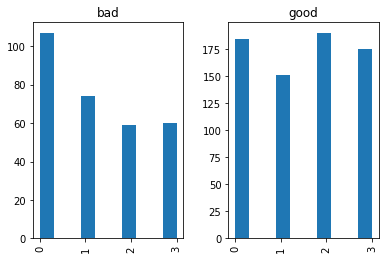

In [192]:
#from the histogram we can see that the bins have a 
#slight bias towards the good credit class
#0:(18.99, 27.0]
#1:(27.0, 33.0]
#2:(33.0, 42.0]
#3:(42.0, 75.0]
df['quartiles_age'].hist(by =df['class'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f093e07f0>,
      dtype=object)

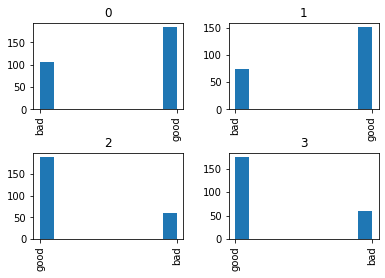

In [194]:
#similary takeaway can be obtained from the histogram obtained below
df['class'].hist(by =df['quartiles_age'])

References: #Some of the links which have been referred to or taken code snippets while completing this quiz

[1] https://github.com/biplav-s/course-d2d-ai

[2] https://stackoverflow.com/questions/

[3] https://scikit-learn.org/stable/

[4] https://pandas.pydata.org